In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

First droping NA values

In [5]:
data[data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [6]:
data.drop(index=9148,inplace=True)

In [7]:
data[data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data.drop(index=10472,inplace=True)

Checking for most repeated values

<AxesSubplot:>

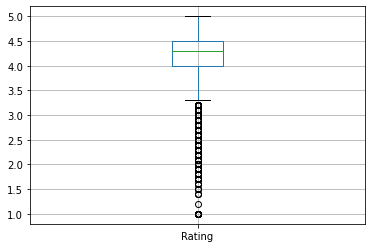

In [9]:
data.boxplot() # boxplot shows most values are in range between 4.0--4.5

Checking skewiness in data

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

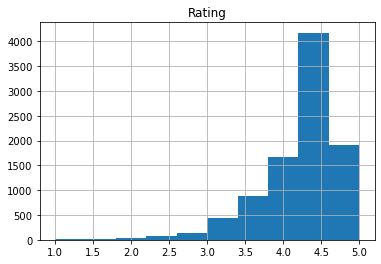

In [10]:
data.hist() # histogram shows that it is left skewed i.e. mode>median>mean in this case

Filling the rest NA values with their modes

In [11]:
data['Rating'].fillna(value=data['Rating'].mode().values[0],inplace=True)
data['Current Ver'].fillna(value=str(data['Current Ver'].mode().values[0]),inplace=True)
data['Android Ver'].fillna(value=str(data['Android Ver'].mode().values[0]),inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Replacing all the non-numeric elements present in the numeric columns i.e. '$'-dollar,'M'-megabyts,'+'-bigger installs

In [13]:
data['Reviews'] = data['Reviews'].apply(lambda x: str(x).replace('M','') if 'M' in x else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in x else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in x else str(x))
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in x else str(x))

In [14]:
data['Reviews'] = pd.to_numeric(data['Reviews'])
data['Installs'] = pd.to_numeric(data['Installs'])
data['Price'] = data['Price'].transform(lambda x:float(x))

In [15]:
data.describe()

,Rating,Reviews,Installs,Price
count,10839.000000,1.083900e+04,1.083900e+04,10839.000000
mean,4.220057,4.441939e+05,1.546577e+07,1.027463
std,0.484217,2.927893e+06,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,3.000000e+03,0.000000
50%,4.400000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [16]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Which category is most rated one?(Categorywise-Rating)

In [17]:
most_rated = pd.DataFrame(data.groupby('Category').mean()['Rating'])
most_rated.head()

,Rating
Category,
ART_AND_DESIGN,4.360000
AUTO_AND_VEHICLES,4.220000
BEAUTY,4.303774
BOOKS_AND_REFERENCE,4.358442
BUSINESS,4.216522


In [18]:
top_rated = most_rated.sort_values(by='Rating',ascending=False) 
top_rated[:10]

,Rating
Category,
EVENTS,4.425000
EDUCATION,4.389103
ART_AND_DESIGN,4.360000
BOOKS_AND_REFERENCE,4.358442
PERSONALIZATION,4.348724
PARENTING,4.316667
BEAUTY,4.303774
HEALTH_AND_FITNESS,4.292962
GAME,4.290997


Its showing that most rated apps are from Events->education->art&design->books&reference
lets check the same with matplotlib

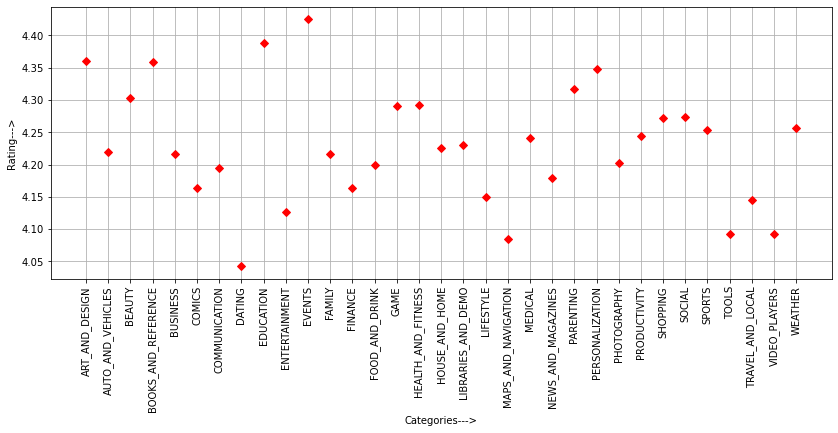

In [19]:
plt.figure(figsize=(14,5))
indexes = [indx for indx,val in data.groupby('Category')]
plt.plot(indexes,data.groupby('Category').mean()['Rating'],'rD')
plt.xticks(rotation=90)
plt.xlabel('Categories--->')
plt.ylabel('Rating--->')
plt.grid()
plt.show()

Which Category has most installed apps?(Categorywise-Apps Installed)

In [20]:
most_installed = pd.DataFrame(data.groupby('Category').sum()['Installs'])
most_installed.head()

,Installs
Category,
ART_AND_DESIGN,124338100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS_AND_REFERENCE,1921469576
BUSINESS,1001914865


In [21]:
top_installed = most_installed.sort_values(by='Installs',ascending=False) 
top_installed[:5]

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


Its showing that most installed apps are from game->communication->productivity->social then tools
lets check the same with matplotlib

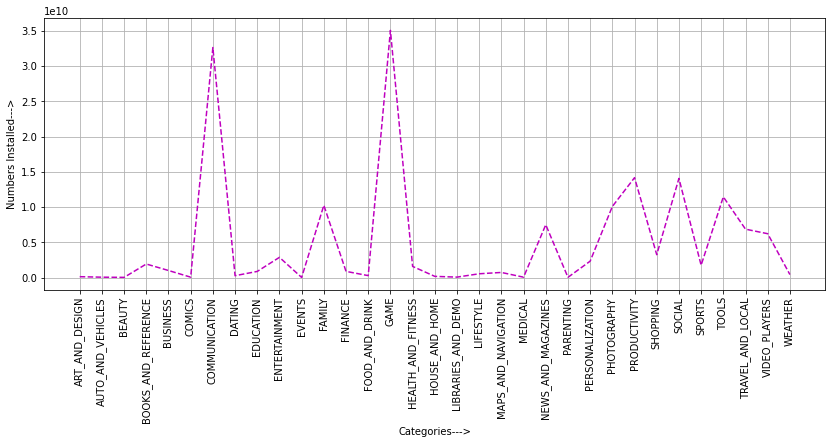

In [22]:
plt.figure(figsize=(14,5))
indexes = [indx for indx,val in data.groupby('Category')]
plt.plot(indexes,data.groupby('Category')['Installs'].sum(),'--',color='m')
plt.xticks(rotation=90)
plt.xlabel('Categories--->')
plt.ylabel('Numbers Installed--->')
plt.grid()
plt.show()

Which Category earned highest revenue?(Categorywise-Revenue earned by apps)

In [23]:
highest_earned = pd.DataFrame(data.groupby('Category').sum()['Price'])
highest_earned.head()

,Price
Category,
ART_AND_DESIGN,5.97
AUTO_AND_VEHICLES,13.47
BEAUTY,0.00
BOOKS_AND_REFERENCE,119.77
BUSINESS,185.27


In [24]:
top_highest = highest_earned.sort_values(by='Price',ascending=False) 
top_highest.head()

,Price
Category,
FINANCE,2900.83
FAMILY,2434.78
LIFESTYLE,2360.87
MEDICAL,1439.96
GAME,287.30


It implies that highest earned categories are from finance->family->lifestyle->medical then gaming
lets check the same with matplotlib

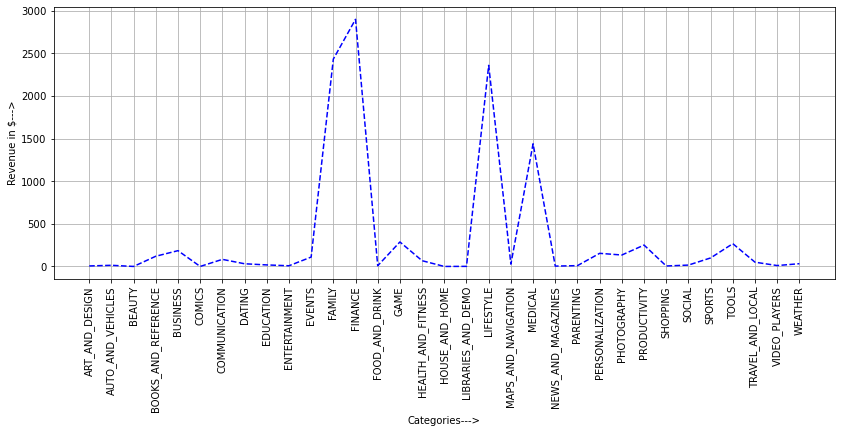

In [25]:
plt.figure(figsize=(14,5))
indexes = [indx for indx,val in data.groupby('Category')]
plt.plot(indexes,data.groupby('Category')['Price'].sum(),'--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Categories--->')
plt.ylabel('Revenue in $--->')
plt.grid()
plt.show()

Number of apps in each category

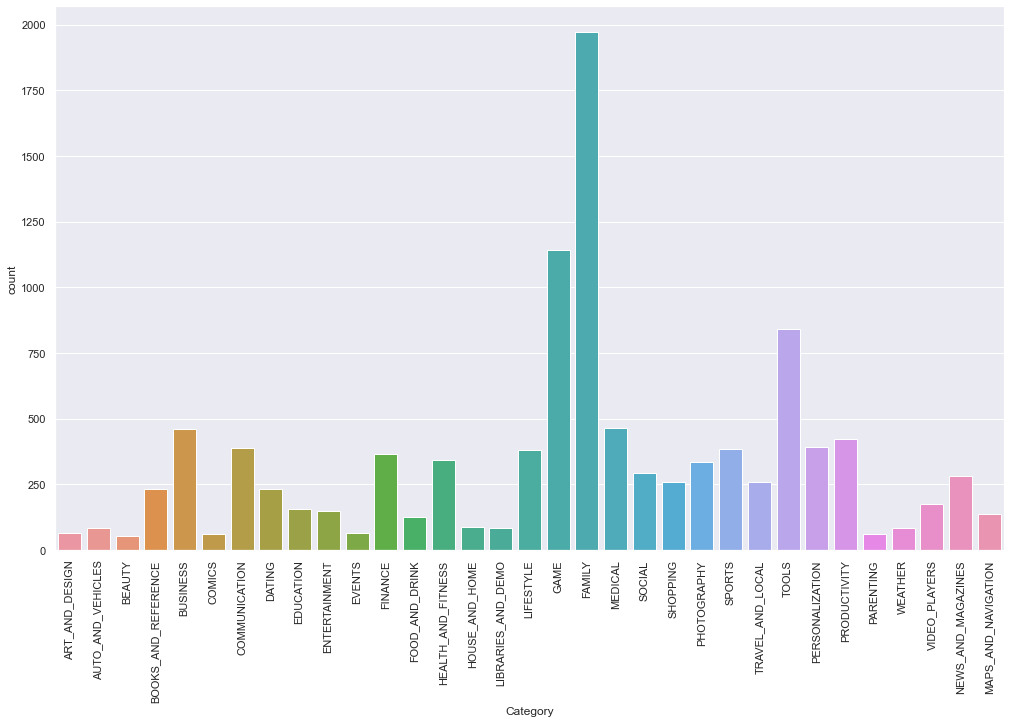

In [26]:
sns.set(rc={'figure.figsize':(17,10)})
p = sns.countplot(x='Category',data=data)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.show()

Result: Family has most apps then game then tools

In [27]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [28]:
viewers = data.groupby("Content Rating")["App"].count().reset_index()
viewers.head()

,Content Rating,App
0,Adults only 18+,3
1,Everyone,8714
2,Everyone 10+,413
3,Mature 17+,499
4,Teen,1208


Text(0.5, 1.0, 'Percentage of Apps viewable to different people')

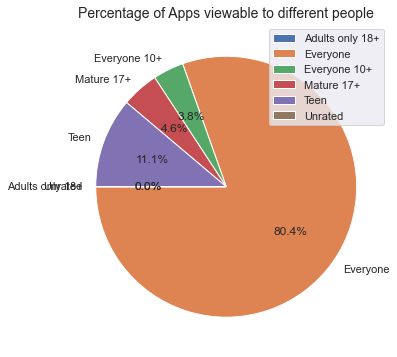

In [29]:
plt.subplots(figsize=[10,6])
labels = viewers['Content Rating'].values
plt.pie(x=viewers['App'], autopct="%.1f%%", labels=labels,startangle=180)
plt.legend()
plt.title("Percentage of Apps viewable to different people", fontsize=14)